In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [4]:
# Whale Returns
whale_returns =pd.read_csv('whale_returns.csv')
whale_returns.dropna(inplace =True)
whale_returns['Date'] = pd.to_datetime(whale_returns['Date']) #convert the dates to a DateTimeIndex
f_whale_returns= whale_returns.set_index('Date')


# Algorithmic Daily Returns
algo_returns =pd.read_csv('algo_returns.csv')
algo_returns.dropna(inplace =True)
algo_returns['Date'] = pd.to_datetime(algo_returns['Date'])   #convert the dates to a DateTimeIndex
f_algo_returns = algo_returns.set_index('Date')


#S&P 500 Returns
sp500_history = pd.read_csv('sp500_history.csv')
sp500_history.dropna(inplace =True)
sp500_history['Date'] = pd.to_datetime(sp500_history['Date']) #convert the dates to a DateTimeIndex


sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history = sp500_history.rename(columns = {'Close': 'SP 500'})
sp500_history = sp500_history.set_index('Date')
f_sp500_history = sp500_history.pct_change()



<ipython-input-4-a4cc6cefc941>:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$','')


## Combine Whale, Algorithmic, and S&P 500 Returns

In [5]:
combined_portfolio = pd.concat([f_whale_returns,f_algo_returns, f_sp500_history], axis = 1, join ='inner')

## Calculate and Plot the daily returns

In [6]:
# Plot daily returns of all portfolios
combined_portfolio.dropna(inplace =True)
combined_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


<AxesSubplot:xlabel='Date'>

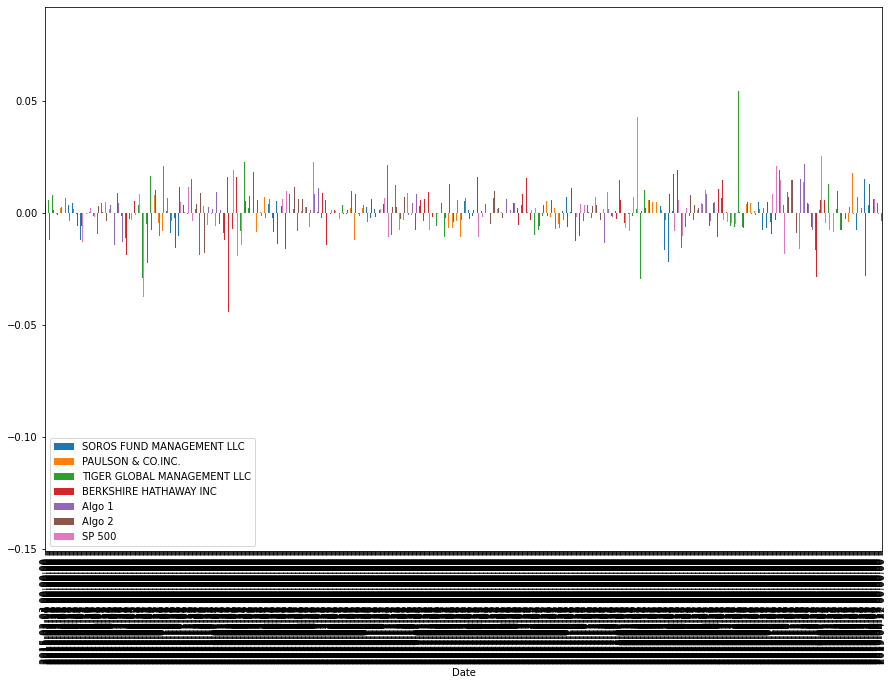

In [30]:
combined_portfolio.plot.bar(figsize= (15,10))

##  Calculate and Plot cumulative returns

In [8]:
#calculate cumulative returns
cumulative_returns = (1 + combined_portfolio).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


<AxesSubplot:xlabel='Date'>

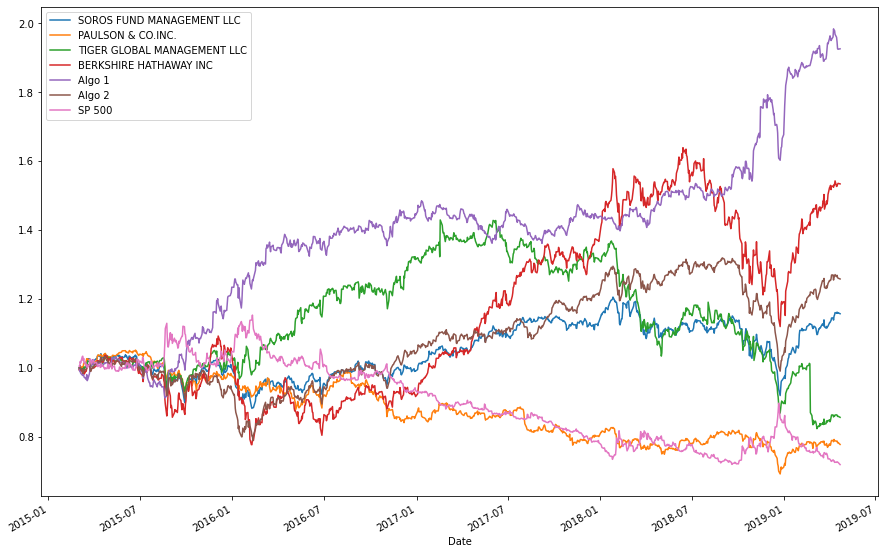

In [9]:
cumulative_returns.plot(figsize =(15,10))

# Create Box Plot For Each Portfolio

<AxesSubplot:>

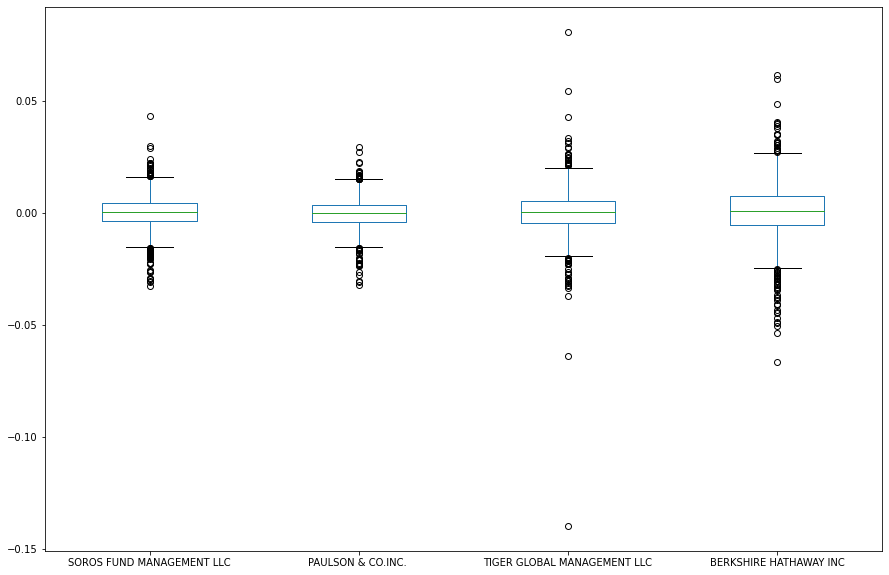

In [28]:
# Box Plot for Whales Portfolio
f_whale_returns.plot(kind ='box', figsize=(15,10))


<AxesSubplot:>

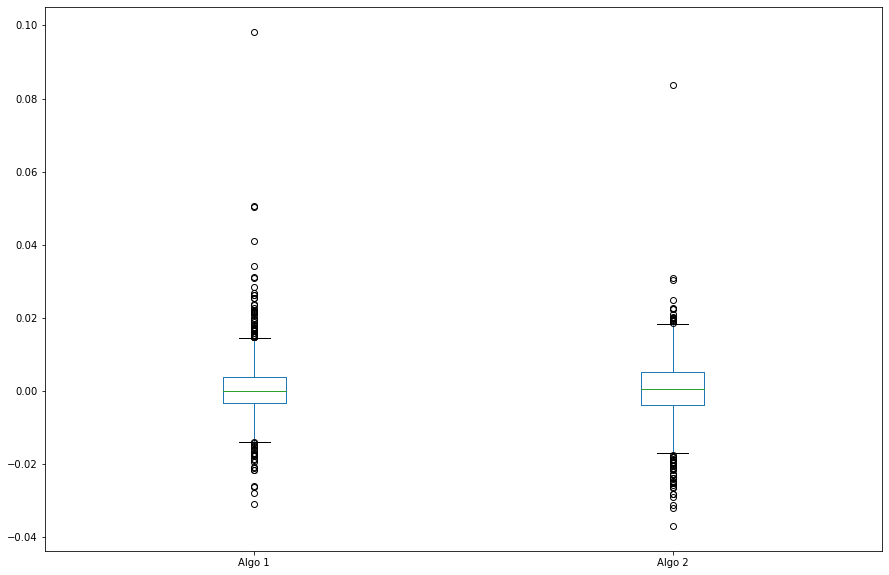

In [29]:
# Box Plot for Algo's portfolio
f_algo_returns.plot(kind ='box', figsize =(15,10))

<AxesSubplot:>

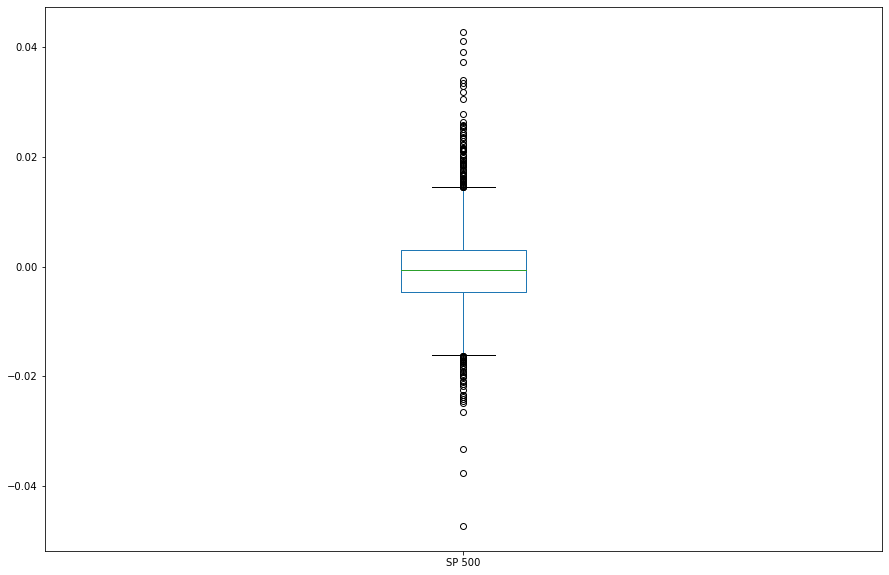

In [33]:
# Box Plot for SP500 portfolio

f_sp500_history.plot(kind ='box', figsize =(15,10))

## Calculate portfolio Standard Deviation

In [25]:
combined_std = combined_portfolio.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP 500                         0.008587
dtype: float64

## Determine which portfolios are riskier than the S&P 500

In [27]:
#converts the series to dictionary items
combined_portfolio_dict = combined_std.to_dict() 

#outputs portfolios with standard deviation > than the std of SP500
risky_portfolios = [x for x,y in combined_portfolio_dict.items() if y > 0.008587]
print(*risky_portfolios, sep =', ')

TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC


## Annualised Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = combined_std * np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP 500                         0.136313
dtype: float64

## Rolling Statistics

<AxesSubplot:xlabel='Date'>

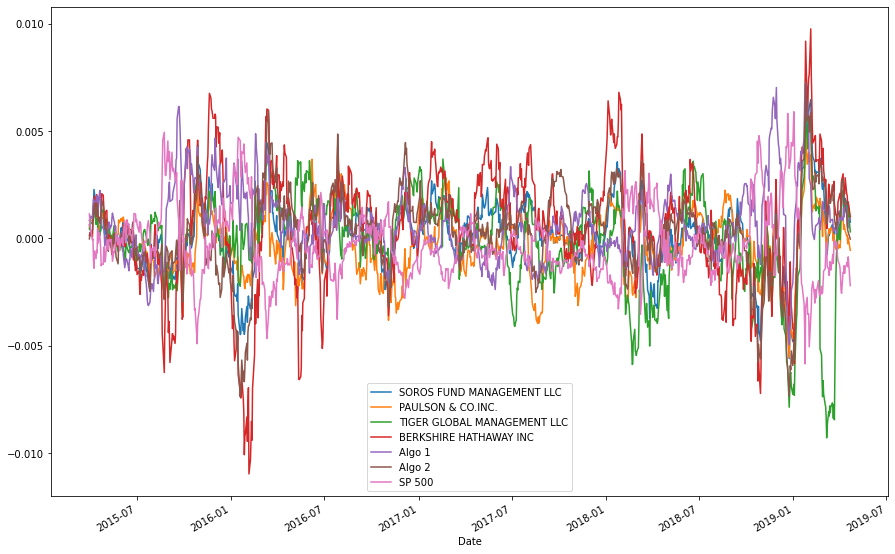

In [32]:
#calculates and plot 21-days window rolling statistics
combined_portfolio.rolling(window=21).mean().plot(figsize =(15,10))

In [42]:
#Calculates correlation between each stock

cp_corr =combined_portfolio.corr()
cp_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

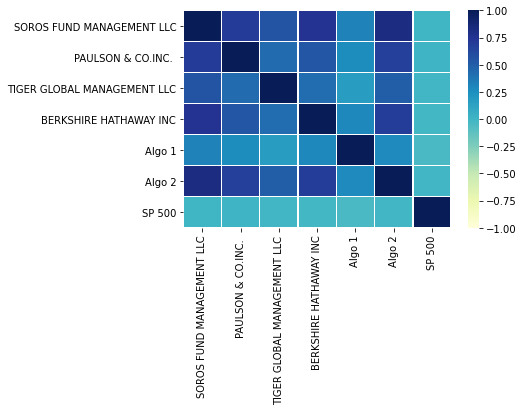

In [47]:
#plot the correlation between each stock to determine which portfolios may mimick the S&P 500.

import seaborn as sns
sns.heatmap(cp_corr, vmin=-1, vmax=1, center=0,  cmap="YlGnBu", linewidths=.5)

In [51]:
# Calculate covariance of all daily returns of SOROS FUND vs. SP 500
covariance = combined_portfolio['SOROS FUND MANAGEMENT LLC'].cov(combined_portfolio['SP 500'])
covariance

3.889726983062067e-08

In [52]:
# Calculate variance of all daily returns of SP 500
variance = combined_portfolio['SP 500'].var()
variance

7.373467552840441e-05

In [53]:
# Calculates beta of all daily returns of SOROS FUND MANAGEMENT LLC
soros_beta = covariance / variance
soros_beta

0.0005275302230852903

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of SOROS Returns vs. SP 500 Returns'}, xlabel='Date'>

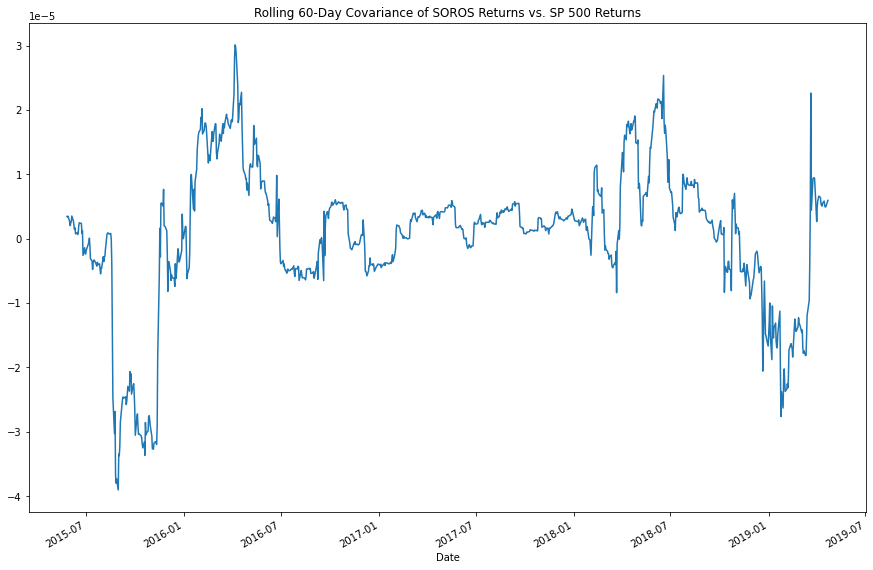

In [55]:
# Calculate 60-day rolling covariance of SOROS vs. SP 500 and plot the data
rolling_covariance = combined_portfolio['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_portfolio['SP 500'])
rolling_covariance.plot(figsize=(15, 10), title='Rolling 60-Day Covariance of SOROS Returns vs. SP 500 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Variance of SP 500 Returns'}, xlabel='Date'>

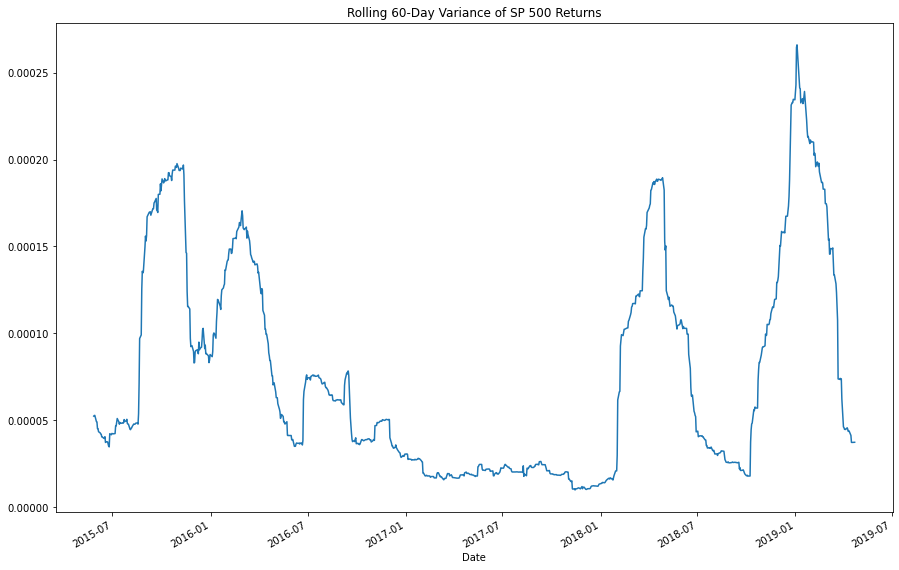

In [57]:
# Calculate 60-day rolling variance of SOROS vs. SP 500 and plot the data
rolling_variance = combined_portfolio['SP 500'].rolling(window=60).var()
rolling_variance.plot(figsize=(15, 10), title='Rolling 60-Day Variance of SP 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of SOROS'}, xlabel='Date'>

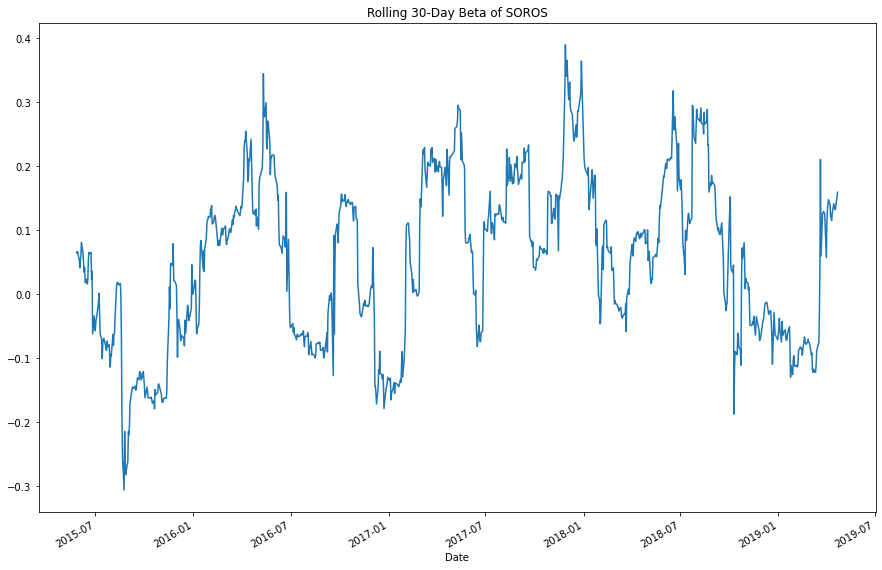

In [59]:
# Calculate 60-day rolling beta of SOROS and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(15, 10), title='Rolling 30-Day Beta of SOROS')